In [6]:
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)
import datetime  # For datetime objects
import os.path  # To manage paths
import sys  # To find out the script name (in argv[0])
import pandas as pd
# Import the backtrader platform
import backtrader as bt
import backtrader.indicators as btind
#import pandas as pd
# to avoid plot disappear everytime rerun the code
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
#plt.figure(figsize=(15,5))

In [17]:
# create a data feed and set formet

data_1 = bt.feeds.GenericCSVData(dataname='./ETF_data_sent/data_XLF.csv',
fromdate=datetime.datetime(2017, 7, 1), # startdate
todate=datetime.datetime(2019, 1, 1), # enddate
                                     
dtformat=('%Y-%m-%d'),tmformat=('%H.%M.%S'),
    date=0, open=1, close=2, high=3, low=4,
    volume=7, openinterest=8, positive_std=-1, negative_std=-1 ,code=-1,
    reverse=False)
#print("finish")
#print(data_1.positive_std)

data_2 = bt.feeds.GenericCSVData(dataname='./ETF_data_sent/data_XLK.csv',
fromdate=datetime.datetime(2017, 7, 1), # startdate
todate=datetime.datetime(2019, 1, 1), # enddate
                                     
dtformat=('%Y-%m-%d'),tmformat=('%H.%M.%S'),
    date=0, open=1, close=2, high=3, low=4,
    volume=7, openinterest=8, positive_std=-1, negative_std=-1 ,code=-1,
    reverse=False)
#print("finish")
#print(data_1.positive_std)


data_3 = bt.feeds.GenericCSVData(dataname='./ETF_data_sent/data_XLI.csv',
fromdate=datetime.datetime(2017, 7, 1), # startdate
todate=datetime.datetime(2019, 1, 1), # enddate
                                     
dtformat=('%Y-%m-%d'),tmformat=('%H.%M.%S'),
    date=0, open=1, close=2, high=3, low=4,
    volume=7, openinterest=8, positive_std=-1, negative_std=-1 ,code=-1,
    reverse=False)
#print("finish")
#print(data_1.positive_std)


data_4 = bt.feeds.GenericCSVData(dataname='./ETF_data_sent/data_XLE.csv',
fromdate=datetime.datetime(2017, 7, 1), # startdate
todate=datetime.datetime(2019, 1, 1), # enddate
                                     
dtformat=('%Y-%m-%d'),tmformat=('%H.%M.%S'),
    date=0, open=1, close=2, high=3, low=4,
    volume=7, openinterest=8, positive_std=-1, negative_std=-1 ,code=-1,
    reverse=False)
#print("finish")
#print(data_1.positive_std)


data_5 = bt.feeds.GenericCSVData(dataname='./ETF_data_sent/data_XLV.csv',
fromdate=datetime.datetime(2017, 7, 1), # startdate
todate=datetime.datetime(2019, 1, 1), # enddate
                                     
dtformat=('%Y-%m-%d'),tmformat=('%H.%M.%S'),
    date=0, open=1, close=2, high=3, low=4,
    volume=7, openinterest=8, positive_std=-1, negative_std=-1 ,code=-1,
    reverse=False)
#print("finish")
#print(data_1.positive_std)


data_6 = bt.feeds.GenericCSVData(dataname='./ETF_data_sent/data_RTH.csv',
fromdate=datetime.datetime(2017, 7, 1), # startdate
todate=datetime.datetime(2019, 1, 1), # enddate
                                     
dtformat=('%Y-%m-%d'),tmformat=('%H.%M.%S'),
    date=0, open=1, close=2, high=3, low=4,
    volume=7, openinterest=8, positive_std=-1, negative_std=-1 ,code=-1,
    reverse=False)


In [18]:
class sentiment_strategy(bt.Strategy):
    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # Buy/Sell order submitted/accepted to/by broker - Nothing to do
            return

        # Check if an order has been completed
        # Attention: broker could reject order if not enough cash
        if order.status in [order.Completed]:
            if order.isbuy():
                self.log(
                    'BUY EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                    (order.executed.price,
                     order.executed.value,
                     order.executed.comm))
                                
                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
                
            else:  # Sell
                self.log('SELL EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                         (order.executed.price,
                          order.executed.value,
                          order.executed.comm))

            self.bar_executed = len(self)

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected')

        # Write down: no pending order
        self.order = None      
        
    def notify_trade(self, trade):
        if not trade.isclosed:
            return

        self.log('OPERATION PROFIT, GROSS %.2f, NET %.2f' %
                 (trade.pnl, trade.pnlcomm))    
    
    def log(self, txt, dt=None):
        ''' Logging function for this strategy'''
        dt = dt or self.datas[0].datetime.date(0)
        #print('%s, %s' % (dt.isoformat(), txt))
        
    def __init__(self):
        # Keep a reference to the "close" line in the data[0] dataseries
        #print("s")
        #high
        #print(self.datas[0].volume)
        self.data_positive = self.datas[0].volume
        self.data_negative = self.datas[0].openinterest
        self.dataclose = self.datas[0].close
        #print("finish_init")
           
    def next(self):
        # Simply log the closing price of the series from the reference
        #self.log('sentiment, %.2f' % self.dataclose[0])
        #print("a")
        time=10
        total_pos=0
        total_neg=0
        for i in range(time):
            where=i-14
            total_pos=total_pos+self.data_positive[where]
            total_neg=total_neg+self.data_negative[where]
        total_pos_avg=total_pos/time
        total_neg_avg=total_neg/time
        #print("b")
        if  total_pos_avg > self.data_positive[0]*(2.3):
            #print("w")
            #print(total_pos_avg)
            self.log('BUY CREATE, %.2f' % self.dataclose[0])
            self.buy(size=5)
        else: 
            if total_neg_avg > self.data_negative[0]*(2.3):
                #print("c")
                #print(total_neg_avg)
                self.log('SELL CREATE, %.2f' % self.dataclose[0])
                self.sell(size=5)


In [19]:
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 10, 8  # that's default image size for this interactive session

pylab.rcParams['font.family'] = 'Segoe Script'
pylab.rcParams['font.sans-serif'] = ['Segoe Script']

#pylab.rcParams['font.family'] = 'sans-serif'
#pylab.rcParams['font.sans-serif'] = ['Bitstream Vera Sans']
#pylab.rcParams['font.serif'] = ['Bitstream Vera Sans']
pylab.rcParams["font.size"] = "10"

Starting Portfolio Value: 100000.00
Final Portfolio Value: 98585.89


<IPython.core.display.Javascript object>


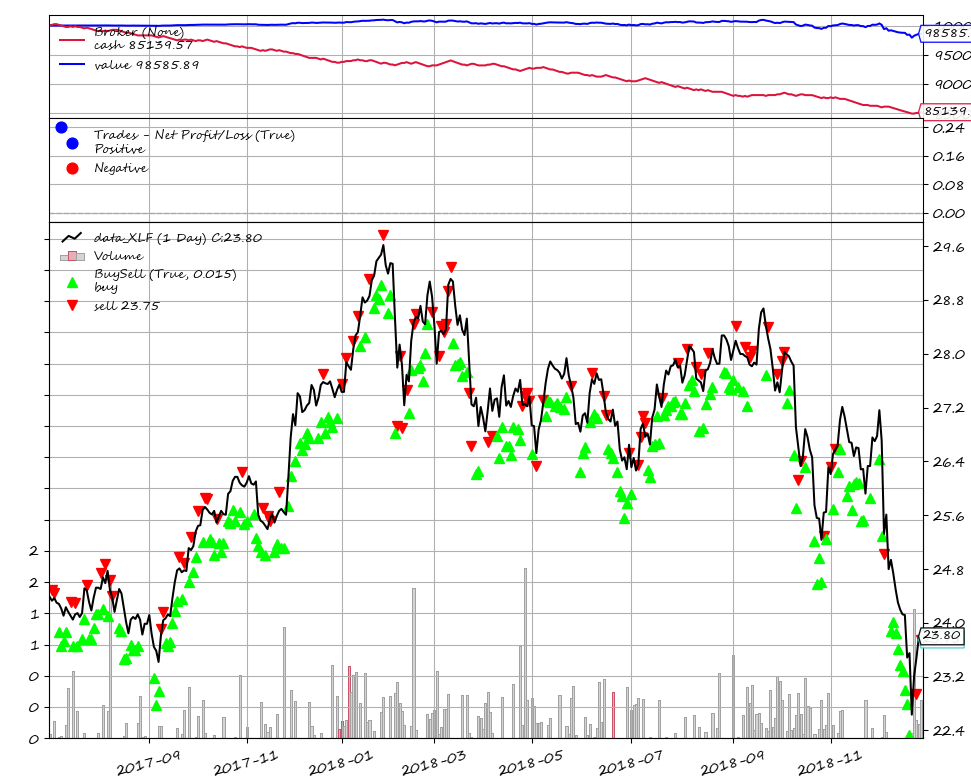

In [26]:
import pandas as pd
if __name__ == '__main__':
    #sentiment=pd.read_excel("/Users/tyllersun/Desktop/大一/data_science/bond.csv")
    cerebro = bt.Cerebro() # creat the "brain"

    # Add a strategy
    cerebro.addstrategy(sentiment_strategy)

    cerebro.adddata(data_1)
    
    cerebro.broker.setcash(100000.0) # the "manager"
    
    # Set the commission - 0.1% ... divide by 100 to remove the % #手續費
    cerebro.broker.setcommission(commission=0.001)
    
    print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

    cerebro.run() # run over everything
    
    print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue()) 
    
    cerebro.plot() # plot the result

Starting Portfolio Value: 100000.00
Final Portfolio Value: 99255.48


<IPython.core.display.Javascript object>


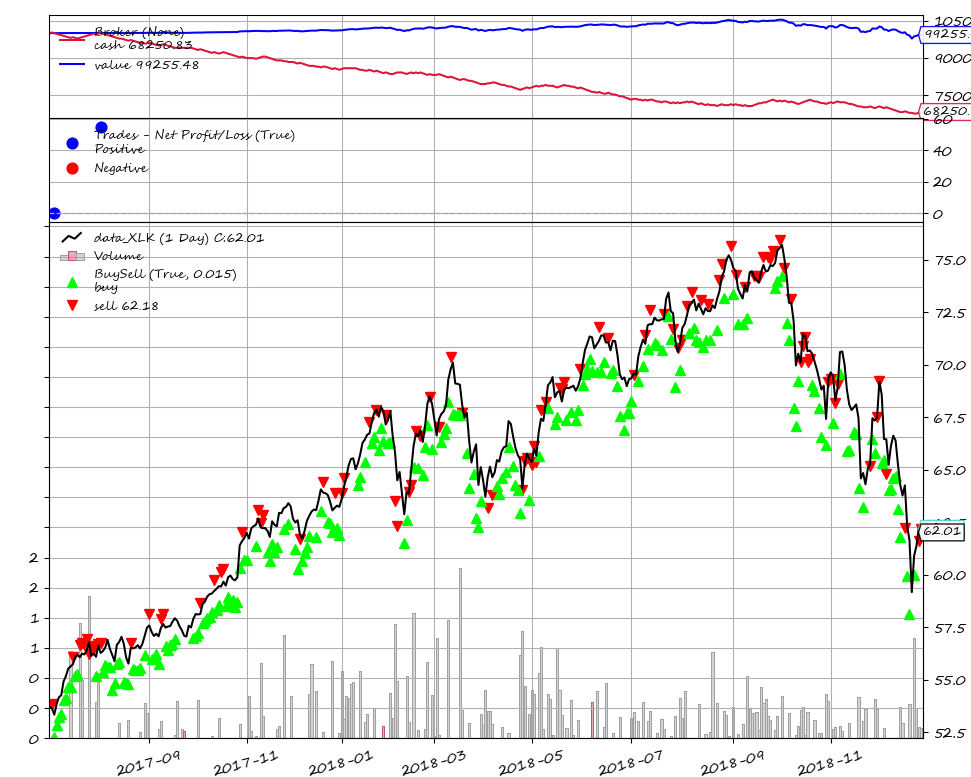

In [25]:
import pandas as pd
if __name__ == '__main__':
    #sentiment=pd.read_excel("/Users/tyllersun/Desktop/大一/data_science/bond.csv")
    cerebro = bt.Cerebro() # creat the "brain"

    # Add a strategy
    cerebro.addstrategy(sentiment_strategy)

    cerebro.adddata(data_2)
    
    cerebro.broker.setcash(100000.0) # the "manager"
    
    # Set the commission - 0.1% ... divide by 100 to remove the % #手續費
    cerebro.broker.setcommission(commission=0.001)
    
    print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

    cerebro.run() # run over everything
    
    print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue()) 
    
    cerebro.plot() # plot the result

Starting Portfolio Value: 100000.00
Final Portfolio Value: 97374.25


<IPython.core.display.Javascript object>


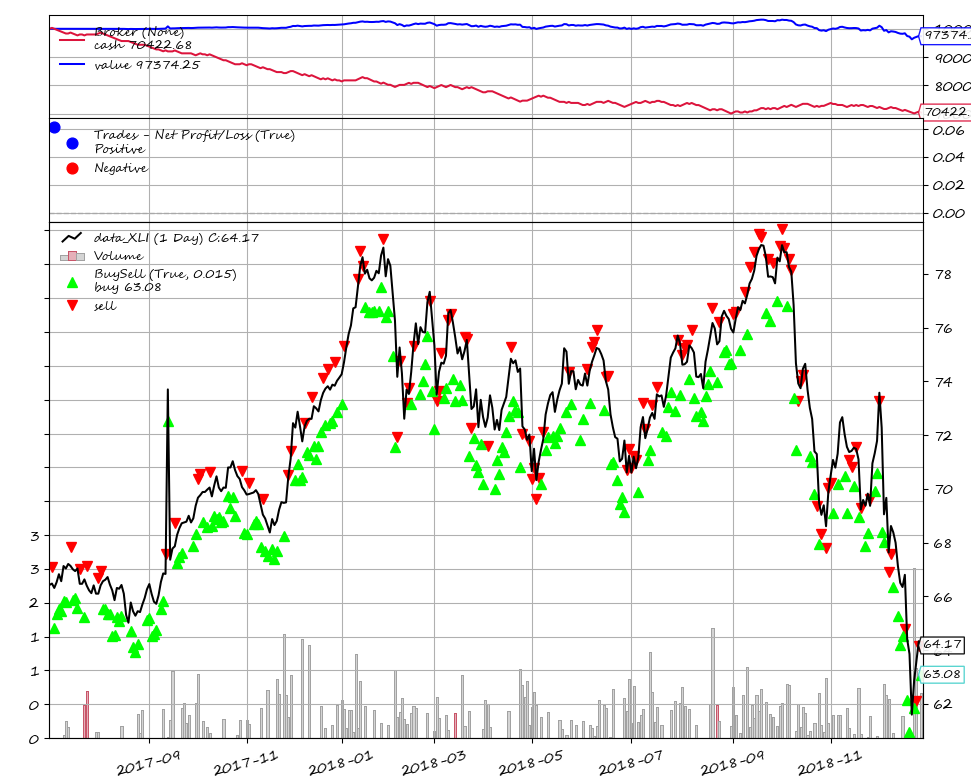

In [21]:
import pandas as pd
if __name__ == '__main__':
    #sentiment=pd.read_excel("/Users/tyllersun/Desktop/大一/data_science/bond.csv")
    cerebro = bt.Cerebro() # creat the "brain"

    # Add a strategy
    cerebro.addstrategy(sentiment_strategy)

    cerebro.adddata(data_3)
    
    cerebro.broker.setcash(100000.0) # the "manager"
    
    # Set the commission - 0.1% ... divide by 100 to remove the % #手續費
    cerebro.broker.setcommission(commission=0.001)
    
    print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

    cerebro.run() # run over everything
    
    print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue()) 
    
    cerebro.plot() # plot the result

Starting Portfolio Value: 100000.00
Final Portfolio Value: 96298.10


<IPython.core.display.Javascript object>


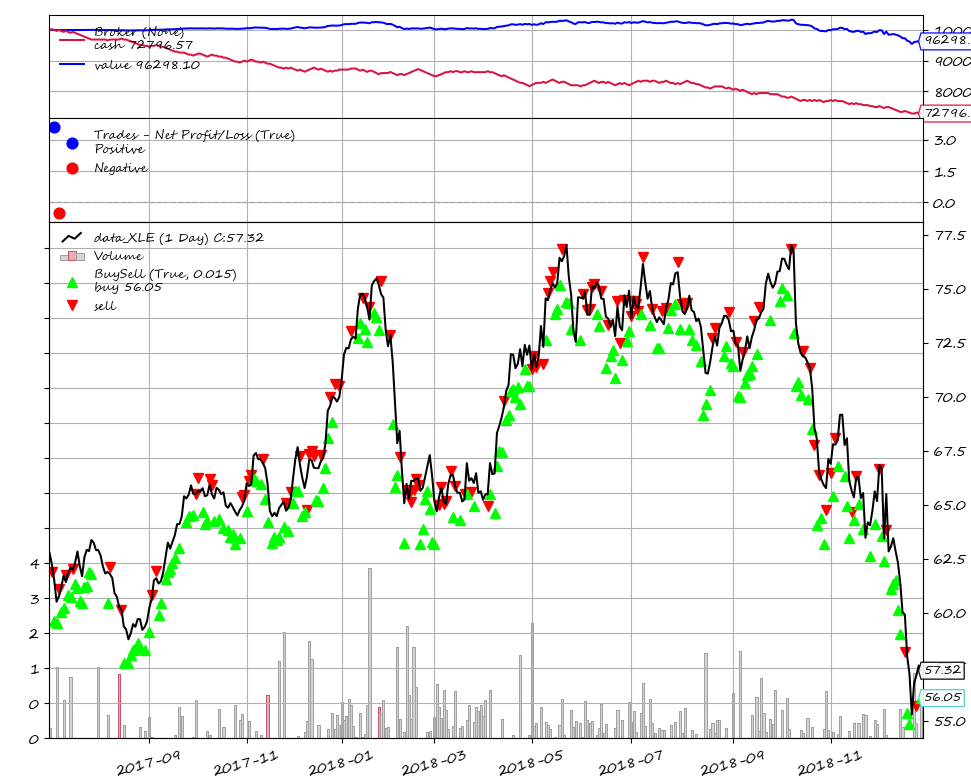

In [22]:
if __name__ == '__main__':
    #sentiment=pd.read_excel("/Users/tyllersun/Desktop/大一/data_science/bond.csv")
    cerebro = bt.Cerebro() # creat the "brain"

    # Add a strategy
    cerebro.addstrategy(sentiment_strategy)

    cerebro.adddata(data_4)
    
    cerebro.broker.setcash(100000.0) # the "manager"
    
    # Set the commission - 0.1% ... divide by 100 to remove the % #手續費
    cerebro.broker.setcommission(commission=0.001)
    
    print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

    cerebro.run() # run over everything
    
    print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue()) 
    
    cerebro.plot() # plot the result

Starting Portfolio Value: 100000.00
Final Portfolio Value: 101409.69


<IPython.core.display.Javascript object>


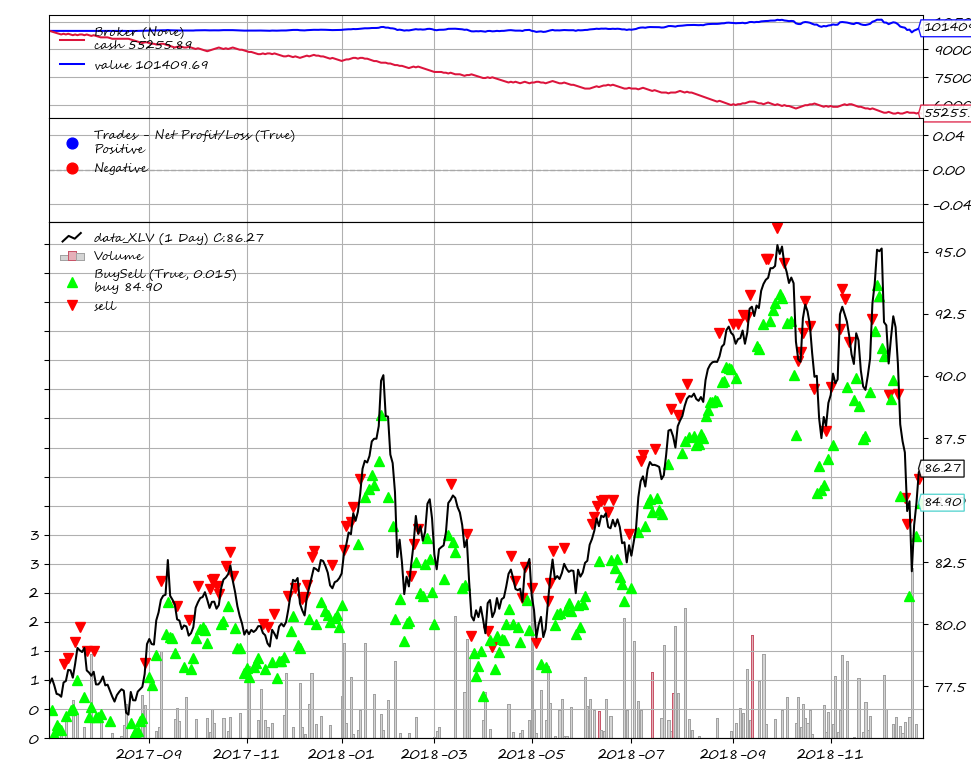

In [23]:
if __name__ == '__main__':
    #sentiment=pd.read_excel("/Users/tyllersun/Desktop/大一/data_science/bond.csv")
    cerebro = bt.Cerebro() # creat the "brain"

    # Add a strategy
    cerebro.addstrategy(sentiment_strategy)

    cerebro.adddata(data_5)
    
    cerebro.broker.setcash(100000.0) # the "manager"
    
    # Set the commission - 0.1% ... divide by 100 to remove the % #手續費
    cerebro.broker.setcommission(commission=0.001)
    
    print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

    cerebro.run() # run over everything
    
    print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue()) 
    
    cerebro.plot() # plot the result

Starting Portfolio Value: 100000.00
Final Portfolio Value: 102195.53


<IPython.core.display.Javascript object>


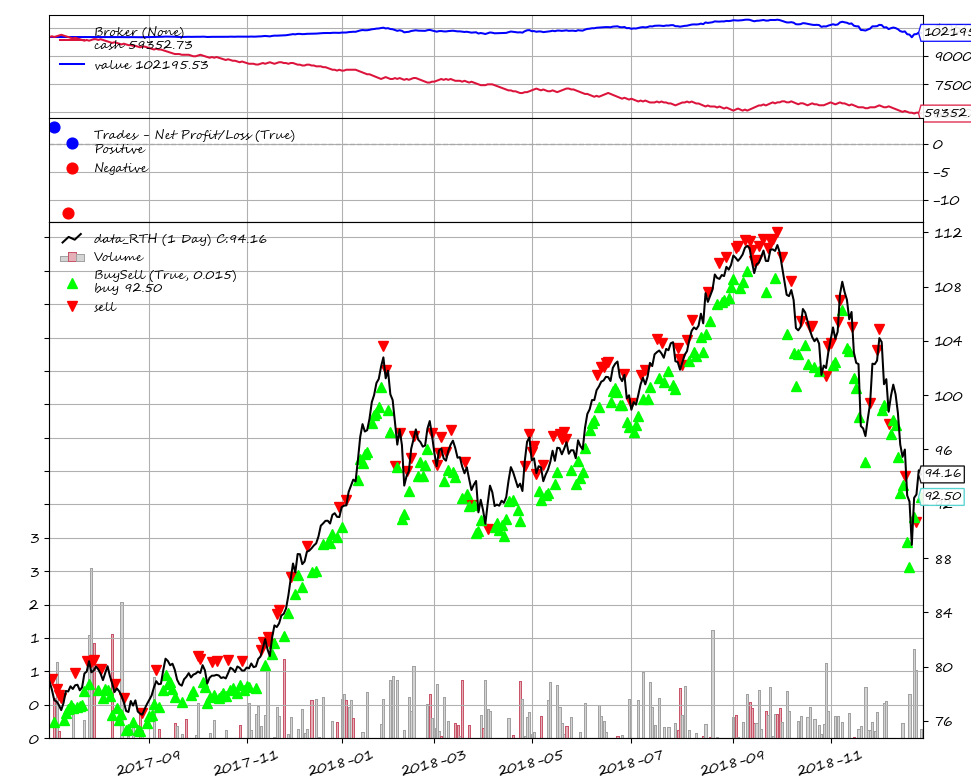

In [24]:
if __name__ == '__main__':
    #sentiment=pd.read_excel("/Users/tyllersun/Desktop/大一/data_science/bond.csv")
    cerebro = bt.Cerebro() # creat the "brain"

    # Add a strategy
    cerebro.addstrategy(sentiment_strategy)

    cerebro.adddata(data_6)
    
    cerebro.broker.setcash(100000.0) # the "manager"
    
    # Set the commission - 0.1% ... divide by 100 to remove the % #手續費
    cerebro.broker.setcommission(commission=0.001)
    
    print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

    cerebro.run() # run over everything
    
    print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue()) 
    
    cerebro.plot() # plot the result